# PreProcessing dataset

In [1]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
doc_visit = pd.read_csv('NPHA-doctor-visits.csv')

In [2]:
# Calculate the class distribution
class_distribution = doc_visit['Number of Doctors Visited'].value_counts()
print(class_distribution)

Number of Doctors Visited
2    372
3    211
1    131
Name: count, dtype: int64


In [3]:
# Drop the Age column since it has only one unique value (2)
doc_visit.drop(['Age'], axis=1, inplace=True)

In [4]:
# Replace only -1 with None (NaN)
doc_visit.replace(-1, pd.NA, inplace=True)

# Check if the replacement worked
print(doc_visit.isnull().sum())  # This will give you the count of NaN values per column(values are now empty there)

Number of Doctors Visited                      0
Phyiscal Health                                1
Mental Health                                 10
Dental Health                                  4
Employment                                     0
Stress Keeps Patient from Sleeping             0
Medication Keeps Patient from Sleeping         0
Pain Keeps Patient from Sleeping               0
Bathroom Needs Keeps Patient from Sleeping     0
Uknown Keeps Patient from Sleeping             0
Trouble Sleeping                               2
Prescription Sleep Medication                  3
Race                                           0
Gender                                         0
dtype: int64


In [5]:
# Step 2: Optionally, Impute the missing values (NaN) with the mode or most frequent value
# For this example, we'll impute with the most frequent value for each column.
doc_visit.fillna(doc_visit.mode().iloc[0], inplace=True)
doc_visit = doc_visit.infer_objects(copy=False)


C:\Users\Niloy\AppData\Local\Temp\ipykernel_5764\2055648549.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  doc_visit.fillna(doc_visit.mode().iloc[0], inplace=True)


In [6]:
# Step 2: Encode only the 'Physical Health' column
# encoder = OneHotEncoder(drop="first", sparse_output=False)
# encoded_physical_health = encoder.fit_transform(doc_visit[['Physical Health']])
doc_visit.rename(columns={'Phyiscal Health': 'Physical Health'}, inplace=True)

In [7]:
print(doc_visit.columns)

Index(['Number of Doctors Visited', 'Physical Health', 'Mental Health',
       'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping',
       'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',
       'Prescription Sleep Medication', 'Race', 'Gender'],
      dtype='object')


In [8]:
# Step 3: Encode each categorical column
encoded_dfs = []  # To store all encoded DataFrames

# Encode Physical Health
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_physical_health = encoder.fit_transform(doc_visit[['Physical Health']])
encoded_physical_health_df = pd.DataFrame(encoded_physical_health, columns=encoder.get_feature_names_out(['Physical Health']))
encoded_dfs.append(encoded_physical_health_df)

# Encode Dental Health
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Reinitialize and fit
encoded_dental_health = encoder.fit_transform(doc_visit[['Dental Health']])
encoded_dental_health_df = pd.DataFrame(encoded_dental_health, columns=encoder.get_feature_names_out(['Dental Health']))
encoded_dfs.append(encoded_dental_health_df)

# Encode Mental Health
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Reinitialize and fit
encoded_mental_health = encoder.fit_transform(doc_visit[['Mental Health']])
encoded_mental_health_df = pd.DataFrame(encoded_mental_health, columns=encoder.get_feature_names_out(['Mental Health']))
encoded_dfs.append(encoded_mental_health_df)

# Encode Employment
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Reinitialize and fit
encoded_employment = encoder.fit_transform(doc_visit[['Employment']])
encoded_employment_df = pd.DataFrame(encoded_employment, columns=encoder.get_feature_names_out(['Employment']))
encoded_dfs.append(encoded_employment_df)

# Encode Prescription Sleep Medication
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Reinitialize and fit
encoded_prescription_sleep_medication = encoder.fit_transform(doc_visit[['Prescription Sleep Medication']])
encoded_prescription_sleep_medication_df = pd.DataFrame(
    encoded_prescription_sleep_medication, 
    columns=encoder.get_feature_names_out(['Prescription Sleep Medication'])
)
encoded_dfs.append(encoded_prescription_sleep_medication_df)

# Encode Race
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Reinitialize and fit
encoded_race = encoder.fit_transform(doc_visit[['Race']])
encoded_race_df = pd.DataFrame(encoded_race, columns=encoder.get_feature_names_out(['Race']))
encoded_dfs.append(encoded_race_df)

# Step 4: Combine the encoded DataFrames with the original DataFrame
# Drop original columns that were encoded
doc_visit.drop(['Physical Health', 'Dental Health', 'Mental Health', 'Employment', 
                'Prescription Sleep Medication', 'Race'], axis=1, inplace=True)

# Concatenate all encoded columns
doc_visit = pd.concat([doc_visit.reset_index(drop=True)] + encoded_dfs, axis=1)

# Step 5: Print final DataFrame structure
print(doc_visit.head())

   Number of Doctors Visited  Stress Keeps Patient from Sleeping  \
0                          3                                   0   
1                          2                                   1   
2                          3                                   0   
3                          1                                   0   
4                          3                                   1   

   Medication Keeps Patient from Sleeping  Pain Keeps Patient from Sleeping  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0   
4                                       0                                 0   

   Bathroom Needs Keeps Patient from Sleeping  \
0                                           0   
1                 

In [9]:
# Select numerical columns for scaling
numerical_columns = [
    'Stress Keeps Patient from Sleeping',
    'Pain Keeps Patient from Sleeping',
    'Bathroom Needs Keeps Patient from Sleeping',
    'Trouble Sleeping'
]

# Initialize and apply the scaler
scaler = MinMaxScaler()
scaled_numerical_features = scaler.fit_transform(doc_visit[numerical_columns])

# Create a DataFrame for scaled features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_columns)

# Drop original numerical columns and add scaled ones
doc_visit.drop(numerical_columns, axis=1, inplace=True)
doc_visit = pd.concat([doc_visit.reset_index(drop=True), scaled_numerical_df], axis=1)

In [54]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (571, 29), y_train shape: (571,)
X_test shape: (143, 29), y_test shape: (143,)


In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({3: 372, 2: 372, 1: 372})


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [60]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.32      0.33        28
           2       0.55      0.58      0.57        74
           3       0.26      0.24      0.25        41

    accuracy                           0.43       143
   macro avg       0.38      0.38      0.38       143
weighted avg       0.43      0.43      0.43       143

Accuracy: 0.43356643356643354


In [15]:
# Step 1: Train a Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Step 2: Evaluate Accuracy
train_accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_test, dt.predict(X_test))
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Step 3: Analyze Impact of Max Depth
train_acc = []
test_acc = []
max_depth = []

# Loop over max_depth values
for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(round(accuracy_score(y_train, clf.predict(X_train)), 3))  # Round the accuracy score
    test_acc.append(round(accuracy_score(y_test, clf.predict(X_test)), 3))      # Round the accuracy score
    max_depth.append(depth)

# Print results for each depth
for i in range(1, 30):
    print(f"Max Depth = {i}, Train Acc. = {train_acc[i-1]}, Test Acc. = {test_acc[i-1]}")

Training Accuracy: 0.954
Test Accuracy: 0.479
Max Depth = 1, Train Acc. = 0.531, Test Acc. = 0.526
Max Depth = 2, Train Acc. = 0.533, Test Acc. = 0.53
Max Depth = 3, Train Acc. = 0.545, Test Acc. = 0.53
Max Depth = 4, Train Acc. = 0.551, Test Acc. = 0.54
Max Depth = 5, Train Acc. = 0.577, Test Acc. = 0.526
Max Depth = 6, Train Acc. = 0.605, Test Acc. = 0.512
Max Depth = 7, Train Acc. = 0.627, Test Acc. = 0.498
Max Depth = 8, Train Acc. = 0.655, Test Acc. = 0.493
Max Depth = 9, Train Acc. = 0.687, Test Acc. = 0.488
Max Depth = 10, Train Acc. = 0.727, Test Acc. = 0.47
Max Depth = 11, Train Acc. = 0.754, Test Acc. = 0.46
Max Depth = 12, Train Acc. = 0.788, Test Acc. = 0.474
Max Depth = 13, Train Acc. = 0.824, Test Acc. = 0.451
Max Depth = 14, Train Acc. = 0.85, Test Acc. = 0.456
Max Depth = 15, Train Acc. = 0.874, Test Acc. = 0.47
Max Depth = 16, Train Acc. = 0.898, Test Acc. = 0.447
Max Depth = 17, Train Acc. = 0.916, Test Acc. = 0.47
Max Depth = 18, Train Acc. = 0.926, Test Acc. = 0.428

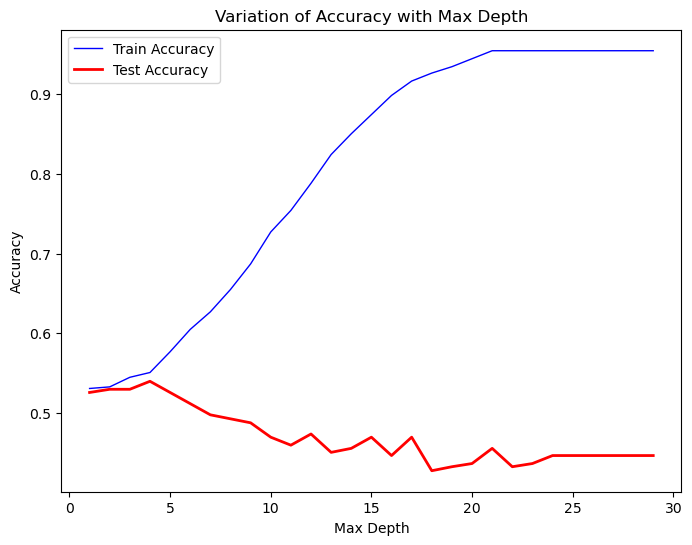

In [16]:
# Plotting
plt.figure(figsize=(8, 6))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy with Max Depth")
plt.plot(max_depth, train_acc, color="blue", linewidth=1, label="Train Accuracy")
plt.plot(max_depth, test_acc, color="red", linewidth=2, label="Test Accuracy")
plt.legend()
plt.show()

In [17]:
# Choose an optimal depth based on the results (e.g., depth with max test accuracy)
optimal_depth = max_depth[test_acc.index(max(test_acc))]
print(f"Optimal Depth: {optimal_depth}")

Optimal Depth: 4


In [18]:
# Train a Decision Tree with the optimal depth
dt = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt.fit(X_train, y_train)

# Evaluate the final model
final_train_accuracy = accuracy_score(y_train, dt.predict(X_train))
final_test_accuracy = accuracy_score(y_test, dt.predict(X_test))
print(f"Final Train Accuracy: {round(final_train_accuracy, 3)}")
print(f"Final Test Accuracy: {round(final_test_accuracy, 3)}")


Final Train Accuracy: 0.551
Final Test Accuracy: 0.54


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assuming X_train and y_train are your training features and target

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5)  # 'cv=5' means 5-fold cross-validation

# Print the cross-validation scores for each fold
print(f"Cross-validation scores: {cv_scores}")

# Calculate and print the mean and standard deviation of the cross-validation scores
print(f"Mean cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_scores):.3f}")


Cross-validation scores: [0.53       0.52       0.52       0.52       0.50505051]
Mean cross-validation score: 0.519
Standard deviation of cross-validation scores: 0.008


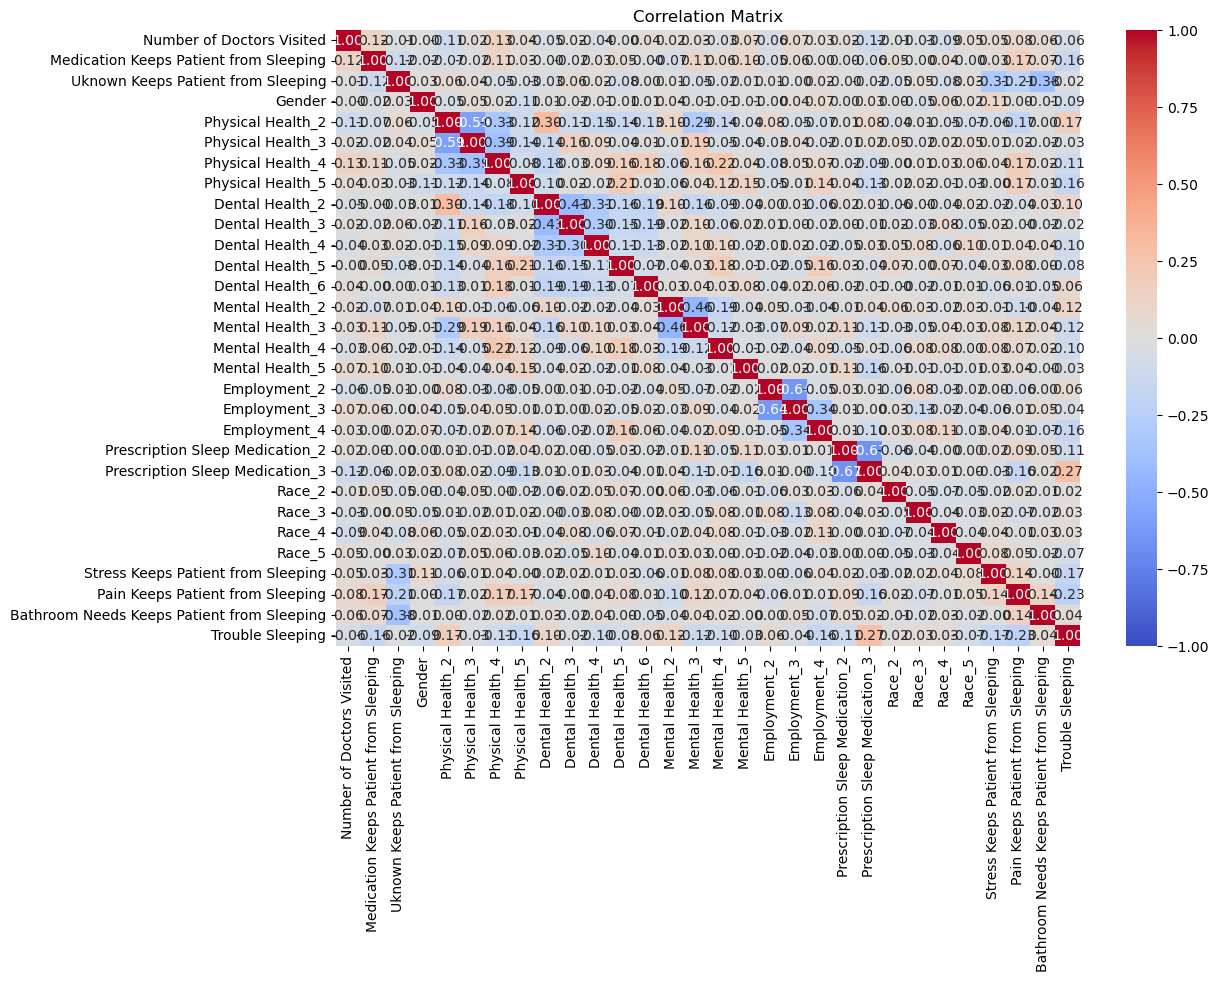

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = doc_visit.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [21]:
target_corr = doc_visit.corr()['Number of Doctors Visited']
print(target_corr)

Number of Doctors Visited                     1.000000
Medication Keeps Patient from Sleeping        0.120549
Uknown Keeps Patient from Sleeping           -0.014095
Gender                                       -0.000139
Physical Health_2                            -0.112026
Physical Health_3                             0.022036
Physical Health_4                             0.133851
Physical Health_5                             0.044266
Dental Health_2                              -0.046863
Dental Health_3                               0.021189
Dental Health_4                              -0.044133
Dental Health_5                              -0.003337
Dental Health_6                               0.044896
Mental Health_2                               0.017865
Mental Health_3                               0.025620
Mental Health_4                              -0.027055
Mental Health_5                               0.068908
Employment_2                                 -0.055086
Employment

Pruned Model - Training Accuracy: 0.555
Pruned Model - Test Accuracy: 0.540


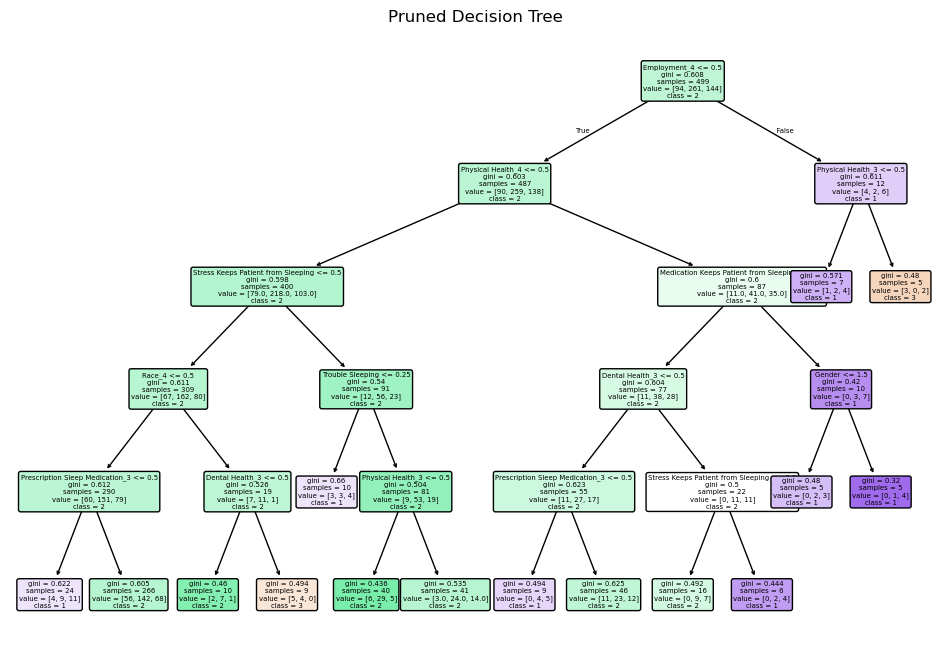

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Step 1: Train a pruned Decision Tree Classifier with hyperparameters
max_depth = 5  # You can adjust this value for experimentation
min_samples_split = 10  # Minimum samples required to split an internal node
min_samples_leaf = 5  # Minimum samples required to be at a leaf node

# Initialize and train the pruned model
pruned_model = DecisionTreeClassifier(max_depth=max_depth, 
                                      min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf, 
                                      random_state=42)

pruned_model.fit(X_train, y_train)

# Step 2: Evaluate Training and Test Accuracy
train_accuracy_pruned = accuracy_score(y_train, pruned_model.predict(X_train))
test_accuracy_pruned = accuracy_score(y_test, pruned_model.predict(X_test))

print(f"Pruned Model - Training Accuracy: {train_accuracy_pruned:.3f}")
print(f"Pruned Model - Test Accuracy: {test_accuracy_pruned:.3f}")

# Step 3: Visualize the Decision Tree (optional)
# Convert class names to list of strings
class_names = [str(i) for i in y.unique()]

# Plot the decision treez

plt.figure(figsize=(12, 8))
plot_tree(pruned_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=5)
plt.title("Pruned Decision Tree")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    
    'criterion': ['gini', 'entropy']
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
train_accuracy_best = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy_best = accuracy_score(y_test, best_model.predict(X_test))

print(f"Best Model - Training Accuracy: {train_accuracy_best:.3f}")
print(f"Best Model - Test Accuracy: {test_accuracy_best:.3f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Model - Training Accuracy: 0.575
Best Model - Test Accuracy: 0.512


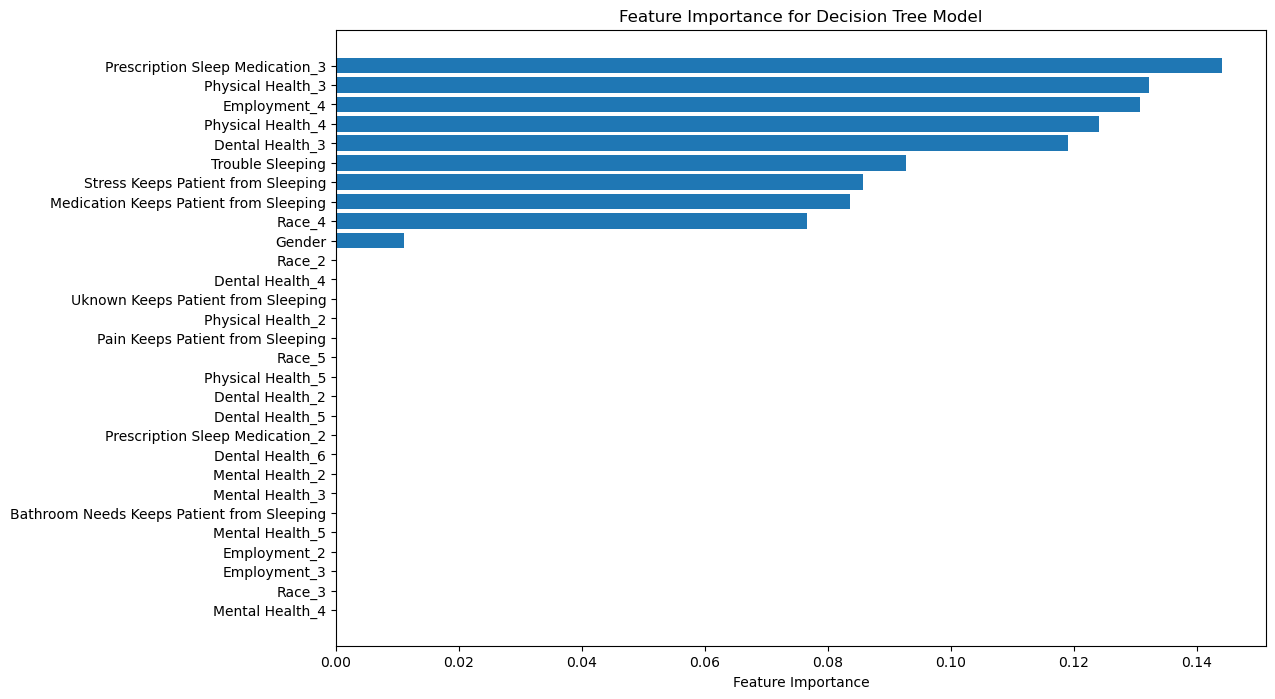

In [24]:
# Get the feature importance
importances = pruned_model.feature_importances_

# Sort the importance
indices = importances.argsort()

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(X.columns[indices], importances[indices], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Model')
plt.show()


In [25]:
# doc_visit.to_csv("updated_NPHA_doctor_visits.csv", index=False)

# Random Foreset

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate accuracy
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Random Forest - Training Accuracy: {rf_train_accuracy:.3f}")
print(f"Random Forest - Test Accuracy: {rf_test_accuracy:.3f}")

Random Forest - Training Accuracy: 0.954
Random Forest - Test Accuracy: 0.474
